2.3.0
2.4.0
(60000, 28, 28) (10000, 28, 28)
(5000, 28, 28) (55000, 28, 28)


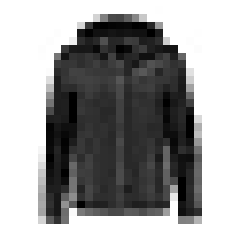

4 indicates Coat


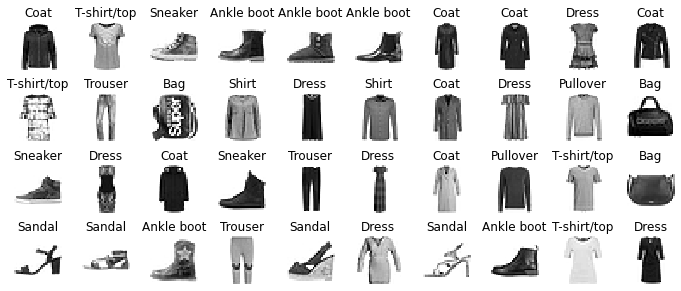

In [27]:
# Init Setting
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

tf.random.set_seed(42)

# load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape)

# split it into training and validation sets
# val: 5000, train: 55000
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print(X_valid.shape, X_train.shape)

import matplotlib as mpl, matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(y_train[0],"indicates", class_names[y_train[0]])

# take a look at a sample of the images in the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [28]:
# Case 1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3438/3438 [==============================] - 2s 455us/step - loss: 0.7792 - accuracy: 0.7353 - val_loss: 0.5574 - val_accuracy: 0.8080
Epoch 2/30
3438/3438 [==============================] - 1s 422us/step - loss: 0.5048 - accuracy: 0.8227 - val_loss: 0.4441 - val_accuracy: 0.8512
Epoch 3/30
3438/3438 [==============================] - 2s 441us/step - loss: 0.4565 - accuracy: 0.8394 - val_loss: 0.5493 - val_accuracy: 0.8038
Epoch 4/30
3438/3438 [==============================] - 1s 435us/step - loss: 0.4286 - accuracy: 0.8481 - val_loss: 0.3981 - val_accuracy: 0.8602
Epoch 5/30
3438/3438 [==============================] - 2s 438us/step - loss: 0.4084 - accuracy: 0.8545 - val_loss: 0.3804 - val_accuracy: 0.8690
Epoch 6/30
3438/3438 [==============================] - 1s 418us/step - loss: 0.3908 - accuracy: 0.8614 - val_loss: 0.3893 - val_accuracy: 0.8680
Epoch 7/30
3438/3438 [==============================] - 2s 443us/step - loss: 0.3790 - accuracy: 0.8653 - val_loss: 0.3697 -

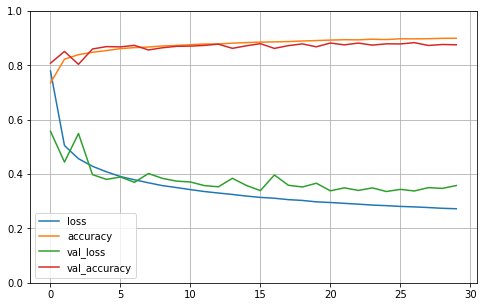

In [29]:
# do training
history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                    validation_data=(X_valid, y_valid))
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 350us/step - loss: 0.3859 - accuracy: 0.8682


[0.3859180212020874, 0.8682000041007996]

In [37]:
# Case 2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3438/3438 [==============================] - 2s 519us/step - loss: 0.6544 - accuracy: 0.7805 - val_loss: 0.4948 - val_accuracy: 0.8332
Epoch 2/30
3438/3438 [==============================] - 2s 485us/step - loss: 0.4755 - accuracy: 0.8339 - val_loss: 0.4303 - val_accuracy: 0.8544
Epoch 3/30
3438/3438 [==============================] - 2s 509us/step - loss: 0.4370 - accuracy: 0.8465 - val_loss: 0.4663 - val_accuracy: 0.8298
Epoch 4/30
3438/3438 [==============================] - 2s 488us/step - loss: 0.4128 - accuracy: 0.8554 - val_loss: 0.3989 - val_accuracy: 0.8624
Epoch 5/30
3438/3438 [==============================] - 2s 486us/step - loss: 0.3962 - accuracy: 0.8618 - val_loss: 0.3792 - val_accuracy: 0.8686
Epoch 6/30
3438/3438 [==============================] - 2s 496us/step - loss: 0.3801 - accuracy: 0.8669 - val_loss: 0.3766 - val_accuracy: 0.8732
Epoch 7/30
3438/3438 [==============================] - 2s 502us/step - loss: 0.3697 - accuracy: 0.8704 - val_loss: 0.3671 -

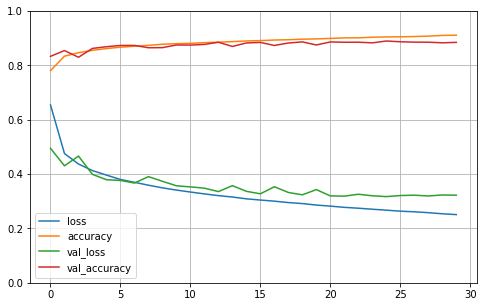

In [38]:
# do training
history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                    validation_data=(X_valid, y_valid))
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 376us/step - loss: 0.3565 - accuracy: 0.8749


[0.35648685693740845, 0.8748999834060669]

In [34]:
# Case 3
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_27 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3438/3438 [==============================] - 2s 702us/step - loss: 0.6442 - accuracy: 0.7756 - val_loss: 0.4800 - val_accuracy: 0.8372
Epoch 2/30
3438/3438 [==============================] - 3s 734us/step - loss: 0.4372 - accuracy: 0.8427 - val_loss: 0.3823 - val_accuracy: 0.8674
Epoch 3/30
3438/3438 [==============================] - 2s 709us/step - loss: 0.3901 - accuracy: 0.8595 - val_loss: 0.4727 - val_accuracy: 0.8214
Epoch 4/30
3438/3438 [==============================] - 3s 761us/step - loss: 0.3607 - accuracy: 0.8687 - val_loss: 0.3468 - val_accuracy: 0.8734
Epoch 5/30
3438/3438 [==============================] - 2s 714us/step - loss: 0.3400 - accuracy: 0.8762 - val_loss: 0.3341 - val_accuracy: 0.8782
Epoch 6/30
3438/3438 [==============================] - 3s 767us/step - loss: 0.3207 - accuracy: 0.8828 - val_loss: 0.3256 - val_accuracy: 0.8808
Epoch 7/30
3438/3438 [==============================] - 3s 771us/step - loss: 0.3073 - accuracy: 0.8880 - val_loss: 0.3260 -

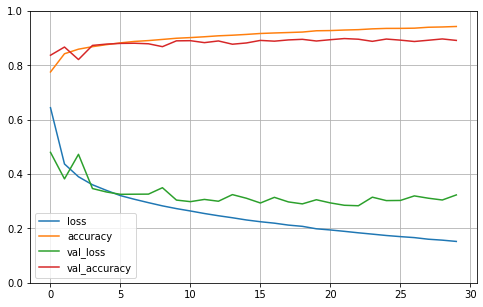

In [35]:
# do training
history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                    validation_data=(X_valid, y_valid))
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 548us/step - loss: 0.3614 - accuracy: 0.8815


[0.361407607793808, 0.8815000057220459]